![loc](img/bg_logo.svg)

### a Python ecosystem for computational (neuro)anatomy

_Federico Claudi; Luigi Petrucco; Adam L. Tyson_

## 3D coordinate spaces

 - Increasing number of large scale, whole brain datasets;
 - coordinate spaces are required to map multiple data types on the same space

## Existing atlas APIs

 - existing atlas APIs limitations: 
     - **web-only** (e.g.: zebrafish; Franklin Paxinos-Allen unified atlas);
     - **very large**, serving both atlas and project-specific data (e.g.: Allen)

 - such limitations affect the possibility of running atlas-agnostic software

## A first very practical case...



 - BrainRender, fantastic library for 3D visualization 
 
 (more on that later)

![loc](img/fede_tw.jpg)

## Our solution:   `bg_atlasapi` 

A lightweight module for use reference spaces in your Python packages and analysis scripts

### Installation:

```pip install bg-atlasapi```

### Usage:

In [19]:
from bg_atlasapi import BrainGlobeAtlas

bg_atlas = BrainGlobeAtlas("allen_mouse_100um")

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


## The `BrainGlobeAtlas` object

A convenient class for interacting with an anatomical atlas. `BrainGlobeAtlas` contains:
 * atlas description:
     * metadata
     * brain structures hierarchy
 * stacks:
     * reference anatomical stack
     * region annotation stack
     * hemisphere annotation stack
 * structures meshes

### Metadata

In [7]:
bg_atlas.metadata

{'name': 'example_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [100.0, 100.0, 100.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [132, 80, 114],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

### Atlas stacks

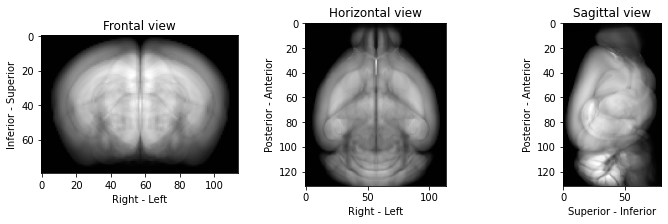

In [20]:
from matplotlib import pyplot as plt

space = bg_atlas.space
stack = bg_atlas.reference

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.mean(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

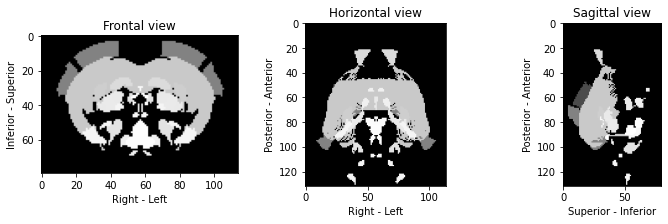

In [21]:
space = bg_atlas.space
stack = bg_atlas.annotation

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

### Regions hierarchy

In [25]:
print(bg_atlas.structures)

root (997)
├── VS (73)
│   ├── AQ (140)
│   ├── V3 (129)
│   ├── V4 (145)
│   │   └── V4r (153)
│   ├── VL (81)
│   │   ├── SEZ (98)
│   │   └── chpl (108)
│   └── c (164)
├── fiber tracts (1009)
│   ├── cbf (960)
│   │   ├── arb (728)
│   │   ├── cbc (744)
│   │   └── cbp (752)
│   │       ├── icp (1123)
│   │       │   └── sctd (553)
│   │       ├── mcp (78)
│   │       └── scp (326)
│   │           ├── dscp (812)
│   │           ├── sctv (866)
│   │           └── uf (850)
│   ├── cm (967)
│   │   ├── IIIn (832)
│   │   │   ├── mlf (62)
│   │   │   └── pc (158)
│   │   ├── IIn (848)
│   │   │   ├── bsc (916)
│   │   │   ├── csc (336)
│   │   │   ├── och (117)
│   │   │   └── opt (125)
│   │   ├── IVn (911)
│   │   ├── In (840)
│   │   │   ├── aco (900)
│   │   │   ├── lotg (21)
│   │   │   │   ├── lot (665)
│   │   │   │   └── lotd (538)
│   │   │   └── onl (1016)
│   │   ├── VIIIn (933)
│   │   │   ├── cVIIIn (948)
│   │   │   │   ├── bic (482)
│   │   │   │   ├── cic (633)
│   │   

### Regions meshes

In [30]:
from trimesh import load
mesh = load(bg_atlas.meshfile_from_structure("CB"))
mesh.show()

## Usage cases: cellfinder

## Usage cases: brainrender